In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import datetime
import pandas as pd
import sys
import numpy as np

sys.path.append("..")
import temporal_graph

## Datos desde csv

Posiblemente puede resultar útil interpretar información desde archivo csv para crear el grafo temporal.

In [3]:
mails_chain = pd.read_csv('../data/mails.csv', encoding='latin1')
mails_chain.head()

,origen,destino,fecha
0,Sofía,María,12/03/2018
1,Sofía,Lucía,12/03/2018
2,Sofía,Martina,1/04/2018
3,Sofía,Catalina,1/04/2018
4,Catalina,Elena,1/04/2018


In [4]:
labels = ['tipo A', 'tipo B', 'tipo C']

In [5]:
mails_chain.shape[0]

57

In [6]:
mails_chain['label'] = [labels[np.random.randint(3)] for _ in range(mails_chain.shape[0])]
mails_chain.tail()

,origen,destino,fecha,label
52,Margarita,Emilia,3/04/2018,tipo B
53,Luciano,Zoe,4/04/2018,tipo A
54,Dana,Martina,5/04/2018,tipo A
55,Imanol,Nicolás,5/04/2018,tipo A
56,Denise,Pedro,6/04/2018,tipo C


In [7]:
# FORMATO_FECHA = '%d/%m/%Y'
tg = temporal_graph.TemporalGraph(pd.to_datetime(mails_chain.fecha, format=temporal_graph.FORMATO_FECHA))

In [8]:
tg.clean_and_build_links_data(mails_chain, 'origen', 'destino', 'fecha', col_label='label', verbose=True)

Enlace:  a c 2018-03-12 00:00:00 a1
Enlace:  a d 2018-03-12 00:00:00 a1
Enlace:  b g 2018-03-12 00:00:00 b1
Enlace:  b h 2018-03-12 00:00:00 b1
Enlace:  b i 2018-03-12 00:00:00 b1
Enlace:  c a 2018-03-12 00:00:00 c1
Enlace:  d a 2018-03-12 00:00:00 d1
Enlace:  f b 2018-03-13 00:00:00 f2
Enlace:  e a 2018-03-13 00:00:00 e2
Enlace:  b a 2018-03-13 00:00:00 b2
Enlace:  i b 2018-03-14 00:00:00 i3
Enlace:  g b 2018-03-14 00:00:00 g3
Enlace:  h b 2018-03-14 00:00:00 h3
Enlace:  l q 2018-03-15 00:00:00 l4
Enlace:  j o 2018-03-15 00:00:00 j4
Enlace:  j p 2018-03-15 00:00:00 j4
Enlace:  j s 2018-03-16 00:00:00 j5
Enlace:  k t 2018-03-17 00:00:00 k6
Enlace:  k n 2018-03-17 00:00:00 k6
Enlace:  b p 2018-03-18 00:00:00 b7
Enlace:  m ab 2018-03-18 00:00:00 m7
Enlace:  j i 2018-03-18 00:00:00 j7
Enlace:  o ac 2018-03-19 00:00:00 o8
Enlace:  f o 2018-03-19 00:00:00 f8
Enlace:  n a 2018-03-19 00:00:00 n8
Enlace:  c l 2018-03-20 00:00:00 c9
Enlace:  l s 2018-03-20 00:00:00 l9
Enlace:  e q 2018-03-20 00

In [9]:
# reemplazos:
tg._node_labels

{'Sofía': 'a',
 'Catalina': 'b',
 'María': 'c',
 'Lucía': 'd',
 'Martina': 'e',
 'Elena': 'f',
 'Emilia': 'g',
 'Valentina': 'h',
 'Paula': 'i',
 'Pablo': 'j',
 'Matías': 'k',
 'Pedro': 'l',
 'Tomás': 'm',
 'Benjamín': 'n',
 'Santiago': 'o',
 'Mateo': 'p',
 'Thiago': 'q',
 'Zoe': 'r',
 'Juan': 's',
 'Nicolás': 't',
 'Diego': 'u',
 'Fiorella': 'v',
 'Margarita': 'w',
 'Luciano': 'x',
 'Dana': 'y',
 'Imanol': 'z',
 'Denise': 'aa',
 'Santino': 'ab',
 'Josefina': 'ac'}

Positions 94 nodos


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


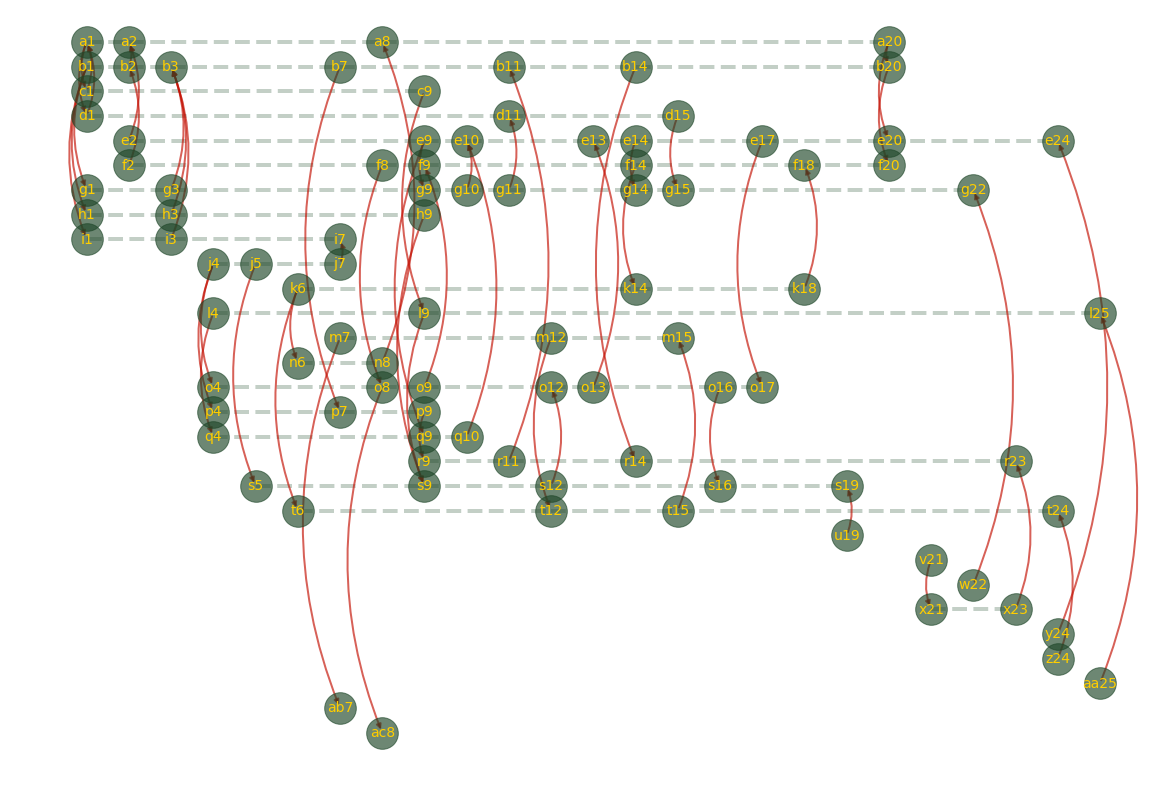

In [10]:
tg.plot()

Positions 88 nodos


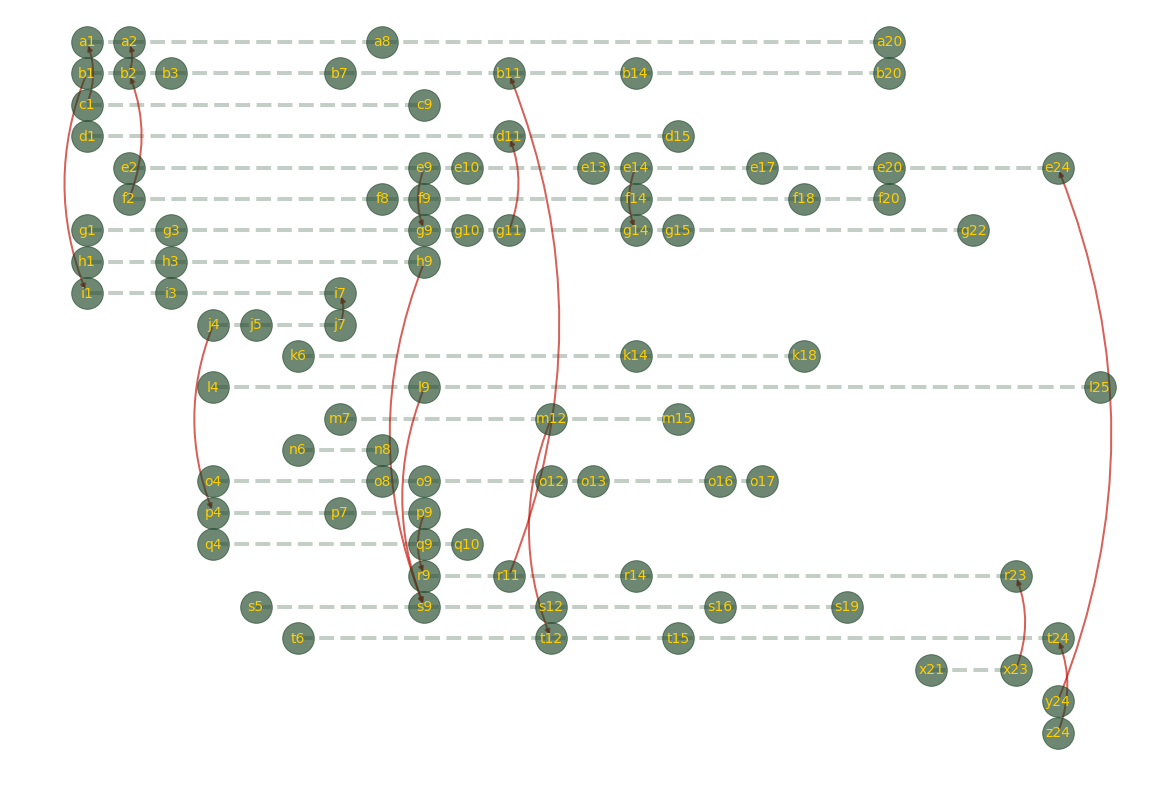

In [11]:
tg.plot(filter_labels='tipo A')

Positions 90 nodos


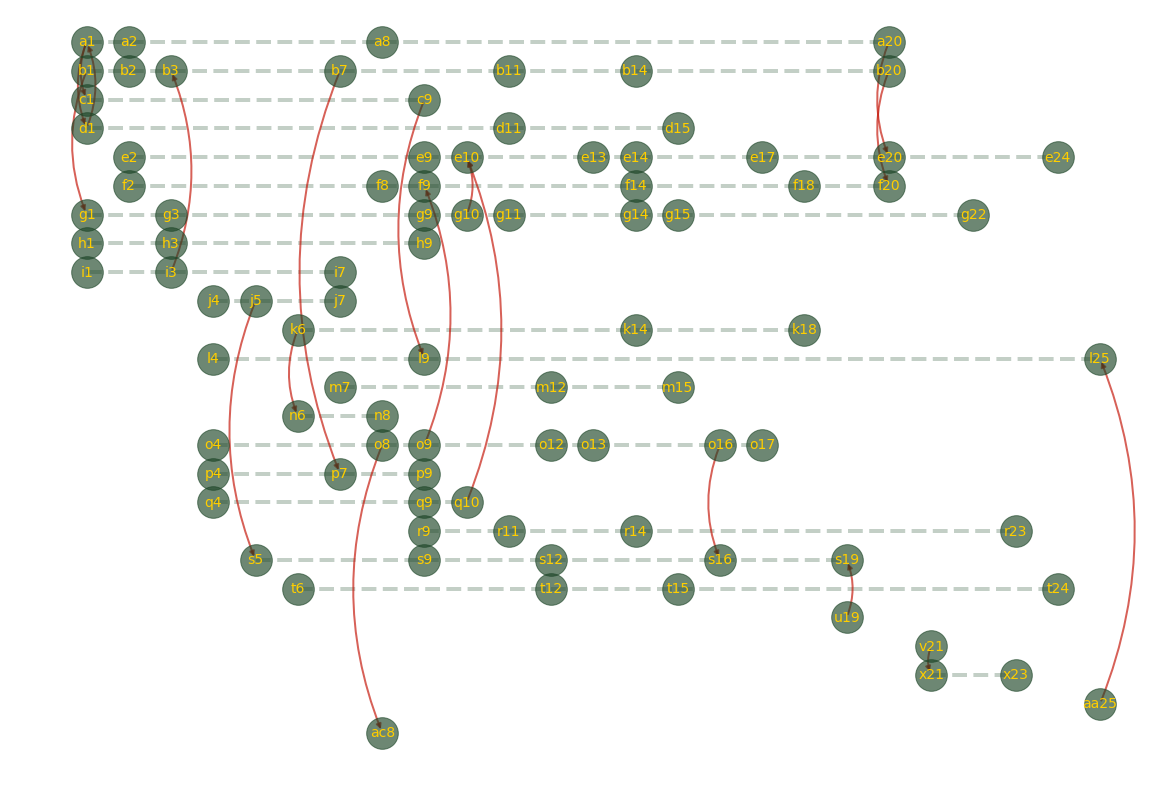

In [12]:
tg.plot(filter_labels='tipo C')

Positions 88 nodos


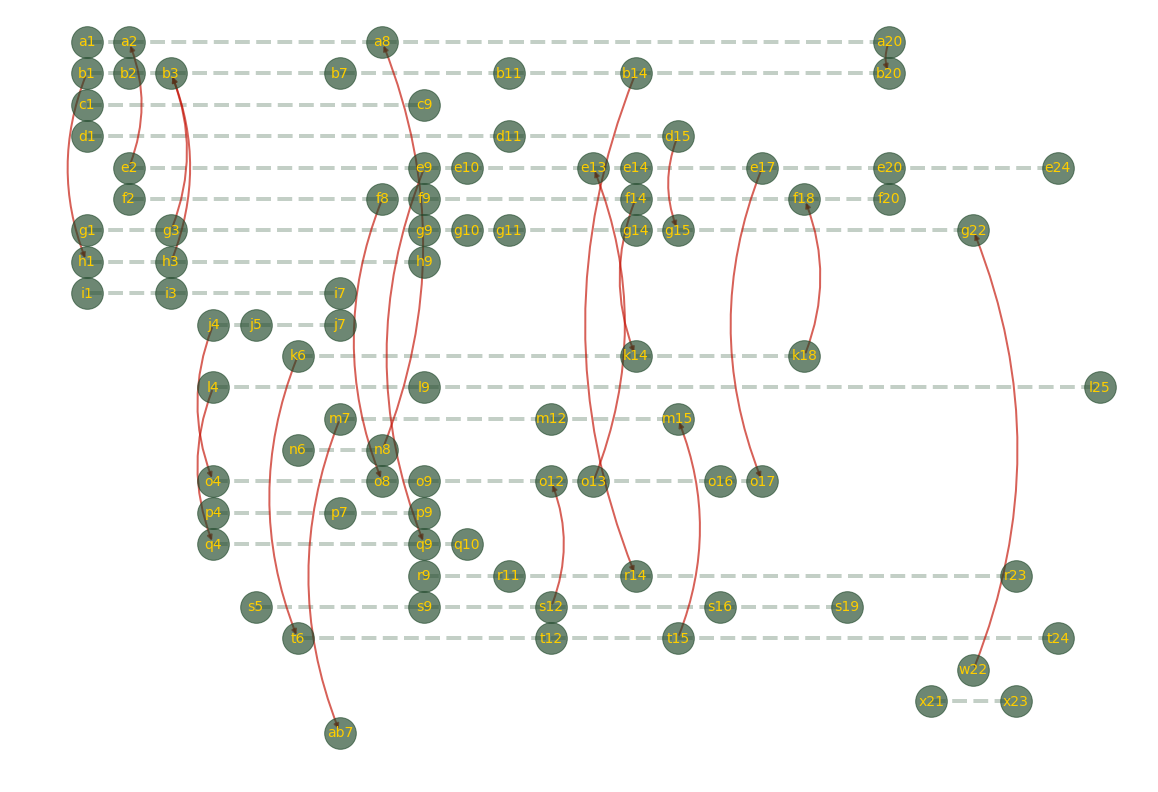

In [13]:
wg = tg.plot(filter_labels='tipo B')

In [14]:
wg.edges(data=True)

OutEdgeDataView([('b2', 'b3', {'weight': 86400.0}), ('f2', 'f8', {'weight': 518400.0}), ('b3', 'b7', {'weight': 345600.0}), ('o8', 'o9', {'weight': 86400.0}), ('p4', 'p7', {'weight': 259200.0}), ('b7', 'b11', {'weight': 345600.0}), ('f14', 'k14', {'weight': 0.0, 'label': 'tipo B'}), ('f14', 'f18', {'weight': 345600.0}), ('g3', 'b3', {'weight': 0.0, 'label': 'tipo B'}), ('g3', 'g9', {'weight': 518400.0}), ('l4', 'q4', {'weight': 0.0, 'label': 'tipo B'}), ('l4', 'l9', {'weight': 432000.0}), ('x21', 'x23', {'weight': 172800.0}), ('n8', 'a8', {'weight': 0.0, 'label': 'tipo B'}), ('b14', 'r14', {'weight': 0.0, 'label': 'tipo B'}), ('b14', 'b20', {'weight': 604800.0}), ('r9', 'r11', {'weight': 172800.0}), ('e20', 'e24', {'weight': 345600.0}), ('o9', 'o12', {'weight': 259200.0}), ('i1', 'i3', {'weight': 172800.0}), ('s16', 's19', {'weight': 259200.0}), ('f18', 'f20', {'weight': 259200.0}), ('j5', 'j7', {'weight': 172800.0}), ('d1', 'd11', {'weight': 864000.0}), ('j4', 'o4', {'weight': 0.0, 'l

In [15]:
tg._get_base_node('a1')

'a'

In [16]:
tg._get_node_participations(
    tg._get_base_node('a1'))

[1, 2, 8, 20]

In [17]:
tiempos = tg._get_node_participations(
    tg._get_base_node('a1'))

In [18]:
tg._substract_position('a8')

8

In [19]:
tg._get_node_instances('a')

['a1', 'a2', 'a8', 'a20']

In [20]:
tg._get_node_instances('a', to_time=8)

['a1', 'a2', 'a8']

In [21]:
tg._get_node_instances('a', to_time=tg._substract_position('a8'))[-2:]

['a2', 'a8']

In [22]:
tg._get_node_instances('a', to_time=tg._substract_position('a2'))[-2:]

['a1', 'a2']

In [23]:
tg._get_node_instances('a', to_time=tg._substract_position('a1'))[-2:]

['a1']

In [25]:
tg.get_previous_instance('a8')

['a2', 'a8']

In [26]:
tg.get_previous_instance('v85')

['v21']

In [27]:
tg.get_previous_instance('a85')

['a8', 'a20']